<a href="https://colab.research.google.com/github/NinaNusb/Intro-Machine-learning/blob/main/Regression_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

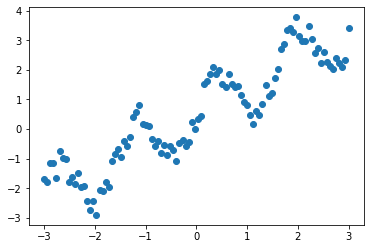

In [ ]:
x = np.linspace(-3, 3, 100)
rng = np.random.default_rng(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o')

1. Why do we call the default_rng method? Why do we pass 42 as a parameter?

1) avoid using np.random.seed and np.random.* functions, such as np.random.random, to generate random values.
Create a new RNG and pass it around using the np.random.default_rng function

ensures good randomness (and independence) of the generated numbers

the number is the seed to make sure we always get the same result 

2. What are the parameters of the ‘fit‘ and ‘predict‘ methods? Why these two methods have
different parameters?

In [ ]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


In [ ]:
# split our data into a train and a test set using the train_test_split method provided by the sklearn API
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

2) The parameters of the fit method are both the X_train and y_train, i.e. "à remplire", whereas the predict one only takes X_train as a parameter. Reason: "compléter"

3. Explain why (in our example) the linear model is “predicting the data as lying on a line”.

In [ ]:
# Instantiate the algorithm 
regressor = LinearRegression()

# Fits the model on the training set
regressor.fit(X_train, y_train)

#predicts on the training set
pred_train_lr= regressor.predict(X_train)
pred_test_lr= regressor.predict(X_test)

In [ ]:
regressor.coef_

array([0.88993958])

In [ ]:
regressor.intercept_

0.4568754917067111

In [ ]:
pred_train_lr

array([-1.40390727e+00, -5.55139644e-02,  2.96488704e+00, -1.72752166e+00,
        1.67042947e+00, -1.61965020e+00,  3.22036161e-01,  2.37159399e+00,
       -7.02742751e-01,  2.80307984e+00, -1.94326459e+00,  1.34681507e+00,
        1.29287934e+00, -3.25192626e-01, -1.34997154e+00,  4.29907626e-01,
       -3.79128358e-01, -1.83539313e+00,  2.91095131e+00, -7.56678483e-01,
       -1.18816434e+00,  2.15585106e+00, -8.64549948e-01,  1.13107214e+00,
       -1.51177873e+00, -9.18485680e-01, -2.05113606e+00, -1.29603581e+00,
       -1.63385429e-01, -1.78145740e+00,  1.99404386e+00, -1.88932886e+00,
        1.23894361e+00, -2.71256893e-01,  2.58733691e+00,  8.07457751e-01,
        3.12669424e+00,  6.99586287e-01,  1.06293232e-01,  4.83843358e-01,
        1.40075081e+00,  2.68100429e-01,  1.45468654e+00,  1.07713641e+00,
        3.01882277e+00,  2.04797959e+00, -1.57823220e-03,  9.15329216e-01,
        3.75971893e-01,  3.07275850e+00,  8.61393483e-01,  1.83223666e+00,
       -4.86999822e-01,  

In [ ]:
(np.sqrt(mean_squared_error(y_train,pred_train_lr)))

0.7526880682742091

In [ ]:
(np.sqrt(mean_squared_error(y_test,pred_test_lr)))

0.7689683888562229

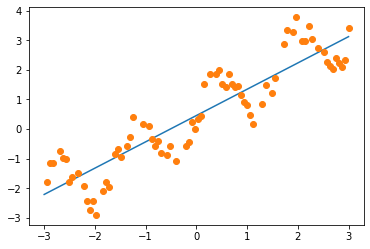

In [ ]:
# paramaters can be accessed through the coef_ and intercept_ attributs, for instance to plot regressor
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

In [ ]:
print(min_pt, max_pt)

-2.2129432534128815 3.1266942368263035


In [ ]:
min_pt = 9 * regressor.coef_[0] + regressor.intercept_
min_pt

8.466331727065489

In [ ]:
# To evaluate the quality of the regressor it is possible to compute the MAE and the MSE:
print("MAE (test): {:.2f}".format(mean_absolute_error(y_test, regressor.predict(X_test))))
print("MSE (test): {:.2f}".format(mean_squared_error(y_test, regressor.predict(X_test))))

MAE (test): 0.67
MSE (test): 0.59


In [ ]:

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

#predicts on the training set
pred_test_lr= regressor.predict(X_test)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

0.7526880682742091
0.8147410224702099
0.7689683888562229
0.7875523429554101


4. What is the difference between MAE and MSE? In which situation would you use the MAE rather than the MSE

the most important tasks is to select an appropriate evaluation metric: these are also called loss functions. There are two kinds of machine learning problems – classification and regression. Here we talk about regression's loss functions. Since every project or data set is different, we must select appropriate evaluation metrics. Usually, more than 1 metrics is required to evaluate a machine learning model.  

Evaluation Metrics or Loss functions for Regression
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean square error (RMSE)
- Root mean square log error (RMSLE)

https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/

5. Compute the MAE and the MSE of the train set. Why is it larger (or smaller) than the value estimated on the test set?

In [ ]:
print("MAE (test): {:.2f}".format(mean_absolute_error(y_test, regressor.predict(X_test))))
print("MSE (test): {:.2f}".format(mean_squared_error(y_test, regressor.predict(X_test))))

MAE (test): 0.67
MSE (test): 0.59


In [ ]:
print("MAE (train): {:.2f}".format(mean_absolute_error(y_train, regressor.predict(X_train))))
print("MSE (train): {:.2f}".format(mean_squared_error(y_train, regressor.predict(X_train))))

MAE (train): 0.64
MSE (train): 0.57


6. Add a (non-linear) feature containing sin(4x) to X and redo the fit as a new column to X_train (and X_test). Visualize the predictions with this new richer, yet linear, model.

In [ ]:
# x = np.linspace(-3, 3, 100)
x_sin = np.sin(4*X)
x_sin

array([[ 0.53657292],
       [ 0.7234557 ],
       [ 0.86802917],
       [ 0.96183833],
       [ 0.99939702],
       [ 0.97850871],
       [ 0.90039501],
       [ 0.76962418],
       [ 0.59384399],
       [ 0.38333447],
       [ 0.15040668],
       [-0.09131724],
       [-0.32770071],
       [-0.54491951],
       [-0.73027018],
       [-0.87291301],
       [-0.96450592],
       [-0.99969234],
       [-0.9764145 ],
       [-0.89603374],
       [-0.76325091],
       [-0.58583144],
       [-0.37415123],
       [-0.14058981],
       [ 0.10119362],
       [ 0.33705902],
       [ 0.55321244],
       [ 0.73701276],
       [ 0.87771091],
       [ 0.96707854],
       [ 0.99988924],
       [ 0.97422416],
       [ 0.89158426],
       [ 0.7568025 ],
       [ 0.57776122],
       [ 0.36493116],
       [ 0.1307591 ],
       [-0.11106004],
       [-0.34638414],
       [-0.56145091],
       [-0.74368277],
       [-0.88242239],
       [-0.96955595],
       [-0.99998769],
       [-0.9719379 ],
       [-0

In [ ]:
x = x.reshape(100,1)
x_sin = x_sin.reshape(100,1)

In [ ]:
X = np.concatenate([x_sin, x], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([1.02041843, 0.97877163])

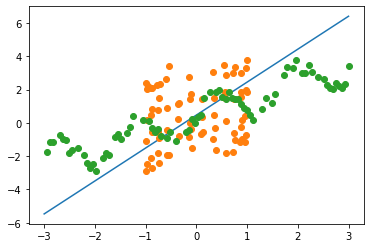

In [ ]:
min_pt = X.min() * regressor.coef_[1] + regressor.intercept_ + X.min() #* regressor.coef_[0]
max_pt = X.max() * regressor.coef_[1] + regressor.intercept_ + X.max() #* regressor.coef_[0]
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

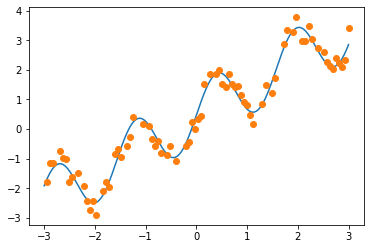

In [26]:
x = np.linspace(-3, 3, 1000)
y = regressor.coef_[0] * np.sin(4*x) + regressor.coef_[1] * x + regressor.intercept_
plt.plot(x, y)
plt.plot(X_train[:, 1], y_train, 'o')

7. Why would you add another features?

8. Split the dataset into a training (80% of the examples) and a test set (20% of the examples)

In [ ]:
from sklearn.datasets import fetch_california_housing
ds = fetch_california_housing()

In [32]:
ds

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [38]:
len(ds.target)

20640

In [33]:
list(ds.feature_names)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [46]:
# Features /observations (=matrix)
X_cal = ds.data
# Labels (=vector)
y_cal = ds.target

# Split le dataset en spécifiant le pourcentage de data à garder dans le test dataset, ici 20%
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(X_cal, y_cal, test_size=0.2)

9. Compute the MSE on the test and train set achieved by a linear regression model

In [47]:
X_test_cal

array([[   2.2368    ,   38.        ,    4.44444444, ...,    3.61587302,
          34.03      , -118.36      ],
       [   8.6718    ,   32.        ,    7.07394366, ...,    2.46478873,
          33.99      , -118.37      ],
       [   1.245     ,   42.        ,    3.62425447, ...,    1.51292247,
          38.58      , -121.48      ],
       ...,
       [   3.8616    ,    8.        ,    6.19      , ...,    2.967     ,
          38.55      , -122.82      ],
       [   2.1975    ,   41.        ,    5.37380192, ...,    2.94089457,
          38.54      , -121.48      ],
       [   3.0043    ,   24.        ,   16.79329609, ...,    2.17877095,
          39.32      , -120.26      ]])

In [48]:
# Fits the model on the training set
regressor.fit(X_train_cal, y_train_cal)

#predicts on the training set
pred_train_lr= regressor.predict(X_train_cal)
pred_test_lr= regressor.predict(X_test_cal)

In [49]:
print("MSE (test): {:.2f}".format(mean_squared_error(y_test_cal, regressor.predict(X_test_cal))))
print("MSE (train): {:.2f}".format(mean_squared_error(y_train_cal, regressor.predict(X_train_cal))))

MSE (test): 0.51
MSE (train): 0.53


10. Explain why it can be interesting to a consider a polynomial regression rather than a simple
linear regression model.

11. Polynomial regression can take into account interactions between features. Considering the
case of a boolean observation vector (i.e. ∀i, xi ∈ {0, 1}), explain why

12. What would be the form of the function considered for a polynomial regression of degree 3?

13. What would be the feature expansion for a polynomial regression of degree 3?

14. Why is it interesting to reduce polynomial regression to linear regression by considering a
feature expansion rather than considering a whole new task?

15. Considering the California housing dataset, fit a polynomial regression model with a degree
between 1 and 10

16. For each model compute the MSE for the training set and the test set. Plot the variation of
these two values with respect to the number of features considered

17. Interpret
